In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
%matplotlib inline

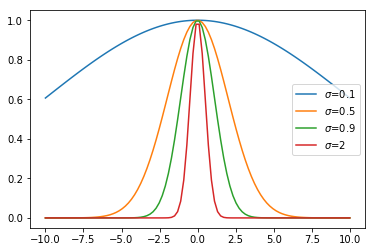

In [2]:
x1 = 0
sigma = 0.5
x2 = np.linspace(-10,10,100)
k = np.zeros((x2.shape[0],1))
for sigma in [0.1,0.5,0.9,2]:
    for i in range(k.shape[0]):
        k[i] = np.exp(-0.5*sigma**2*((x1 - x2[i])**2));
    plt.plot(x2,k,label='$\sigma$='+str(sigma))
plt.legend()

### Demonstration of Kernel Methods

#### 1D Case
First create a sample 1-D dataset which is not linearly separable

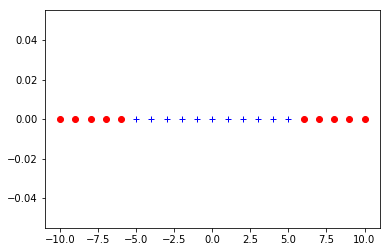

In [3]:
X = np.linspace(-10,10,21)
y = np.zeros((X.shape[0],1))
y[5:16] = 1
plt.plot(X[np.where(y == 0)[0]],y[np.where(y == 0)[0]],'ro')
plt.plot(X[np.where(y == 1)[0]],0*y[np.where(y == 1)[0]],'b+')

Next map the data into a higher order space $X \rightarrow X,X^2$

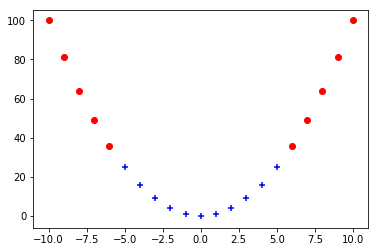

In [4]:
X1 = np.vstack((X,X**2)).transpose()
plt.scatter(X1[np.where(y == 0)[0],0],X1[np.where(y == 0)[0],1],c='r',marker='o')
plt.scatter(X1[np.where(y == 1)[0],0],X1[np.where(y == 1)[0],1],c='b',marker='+')

Next find a linearly separable hyperplane in the new space

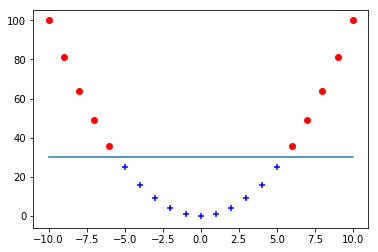

In [5]:
plt.scatter(X1[np.where(y == 0)[0],0],X1[np.where(y == 0)[0],1],c='r',marker='o')
plt.scatter(X1[np.where(y == 1)[0],0],X1[np.where(y == 1)[0],1],c='b',marker='+')
plt.plot([-10,10],[30,30])

Map the higher dimensional hyperplane in the lower dimension

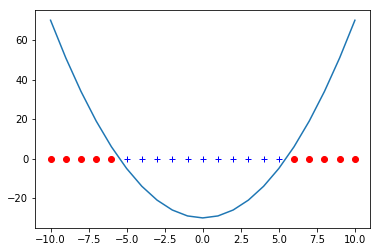

In [6]:
plt.plot(X[np.where(y == 0)[0]],y[np.where(y == 0)[0]],'ro')
plt.plot(X[np.where(y == 1)[0]],0*y[np.where(y == 1)[0]],'b+')
plt.plot(X,X**2-30)


### 2D Case
Let us consider the XOR data example

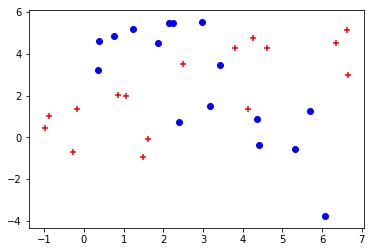

In [7]:
sigma = np.array([[2,0],[0,2]])
n = 8
mu1 = np.array([1,1])
mu2 = np.array([1,5])
mu3 = np.array([5,1])
mu4 = np.array([5,5])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.ones([4*n,1])
y[n:3*n] = 2
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='b',marker='o')


### Radial Basis Function Kernel or the Gaussian Kernel
\begin{equation}
k({\bf x},{\bf x}') = exp\left(-\frac{1}{2\sigma^2}||{\bf x}-{\bf x}'||^2\right)
\end{equation}

The parameter $\sigma$ controls the width of the kernel as shown below.

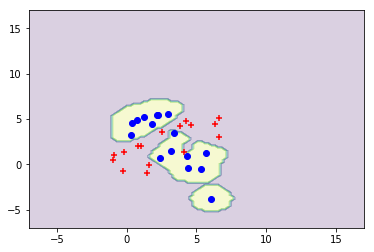

In [8]:
# define some means for RBF (here we can use the means of the above clusters)
#mus = np.vstack((mu1,mu2,mu3,mu4))
mus = X
sigma = 0.5
# map the data into a 4D space using RBF kernel
kX = np.zeros((X.shape[0],mus.shape[0]))
for i in range(mus.shape[0]):
    for j in range(X.shape[0]):
        kX[j,i] = np.exp(-np.sum((X[j,:] - mus[i,:])**2)/sigma)
    
# Learn logistic regression
lr = lm.LogisticRegression()
w = lr.fit(kX,y.ravel())

# evaluate on a grid
x1 = np.linspace(-7,17,100)
x2 = np.linspace(-7,17,100)
xx1,xx2 = np.meshgrid(x1,x2)
Xstar = np.zeros((x1.shape[0]*x2.shape[0],2))
Xstar[:,0] = xx1.ravel()
Xstar[:,1] = xx2.ravel()
kXstar = np.zeros((Xstar.shape[0],mus.shape[0]))
for i in range(mus.shape[0]):
    for j in range(Xstar.shape[0]):
        kXstar[j,i] = np.exp(-np.sum((Xstar[j,:] - mus[i,:])**2)/sigma)
ystar = lr.predict(kXstar)

# visualize the result
plt.contourf(x1,x2,ystar.reshape((x1.shape[0],x2.shape[0])),alpha=0.2)
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='b',marker='o')